In [ ]:
!pip install transformers
!pip install transformers[torch]
!pip install accelerate -U
!pip install datasets
!pip install rouge_score
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=c9fb26e79e9d99b306669ed22a6753454b0b0655a68c136c95def72ee78b2857
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 3.3 MB/s eta 0:00:00


## Dataset Download

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"diquintero13","key":"3c8c5ee91311aeee2699dd0c058cc0c5"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d raddar/chest-xrays-indiana-university --force

100% 13.2G/13.2G [02:10<00:00, 44.4MB/s]
100% 13.2G/13.2G [02:11<00:00, 108MB/s] 


In [ ]:
!cd /content
!unzip -q /content/chest-xrays-indiana-university.zip -d /content/Dataset

## Dataset Persistence

In [ ]:
cd /content

/content


In [ ]:
# Specify the folder path and output HDF5 file
images_path = "/content/Dataset/images/images_normalized"
images_data_paths = ["images_data_front_00.h5", "images_data_front_01.h5", "images_data_front_02.h5", "images_data_front_03.h5"]
repo_path = 'transformers-image-captioning/data/front/'
repo_features_path = 'transformers-image-captioning/features/front/'

In [ ]:
# Specify the folder path and output HDF5 file
images_path = "/content/Dataset/images/images_normalized"
images_data_paths = ["images_data_front_eq_00.h5", "images_data_front_eq_01.h5", "images_data_front_eq_02.h5", "images_data_front_eq_03.h5"]
repo_path = 'transformers-image-captioning/data/front_eq/'
repo_features_path = 'transformers-image-captioning/features/front_eq/'

In [ ]:
# Specify the folder path and output HDF5 file
images_path = "/content/Dataset/images/images_normalized"
images_data_paths = ["images_data_front_eq_mask_00.h5", "images_data_front_eq_mask_01.h5", "images_data_front_eq_mask_02.h5", "images_data_front_eq_mask_03.h5"]
repo_path = 'transformers-image-captioning/data/front_eq_mask/'
repo_features_path = 'transformers-image-captioning/features/front_eq_mask/'

In [ ]:
import csv
csv_file_path = 'indiana_projections.csv'  # Replace this with the actual path to your CSV file

# Read the CSV file into a dictionary
csv_data = {}
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        # Use the 'filename' (second column) as the key and 'projection' (third column) as the value
        csv_data[row['filename']] = row['projection']

print(csv_data)

{'1_IM-0001-4001.dcm.png': 'Frontal', '1_IM-0001-3001.dcm.png': 'Lateral', '2_IM-0652-1001.dcm.png': 'Frontal', '2_IM-0652-2001.dcm.png': 'Lateral', '3_IM-1384-1001.dcm.png': 'Frontal', '3_IM-1384-2001.dcm.png': 'Lateral', '4_IM-2050-1001.dcm.png': 'Frontal', '4_IM-2050-2001.dcm.png': 'Lateral', '5_IM-2117-1003002.dcm.png': 'Frontal', '5_IM-2117-1004003.dcm.png': 'Lateral', '6_IM-2192-1001.dcm.png': 'Frontal', '6_IM-2192-2001.dcm.png': 'Lateral', '7_IM-2263-1001.dcm.png': 'Frontal', '7_IM-2263-2001.dcm.png': 'Lateral', '8_IM-2333-1001.dcm.png': 'Frontal', '8_IM-2333-2001.dcm.png': 'Lateral', '9_IM-2407-1001.dcm.png': 'Frontal', '9_IM-2407-2001.dcm.png': 'Lateral', '10_IM-0002-2001.dcm.png': 'Frontal', '10_IM-0002-1001.dcm.png': 'Lateral', '11_IM-0067-1001.dcm.png': 'Frontal', '11_IM-0067-2001.dcm.png': 'Lateral', '12_IM-0133-1001.dcm.png': 'Frontal', '12_IM-0133-2001.dcm.png': 'Lateral', '13_IM-0198-1001.dcm.png': 'Frontal', '13_IM-0198-2001.dcm.png': 'Lateral', '14_IM-0256-1001.dcm.pn

In [ ]:
from cv2.typing import Range
import cv2
import os
import numpy as np
import h5py

image_ids_path = "image_ids.txt"

def persist_dataset(images_path, images_data_path, RANGE):

    print(RANGE)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(images_path)][RANGE[0]:RANGE[1]]

    images_tensor = None

    with open(image_ids_path, 'a') as file:
        # Process and store images in the tensor

        n = 0
        images = []

        for i, image_file in enumerate(image_files):

            image_path = os.path.join(images_path, image_file)

            projection = csv_data.get(image_file)

            if projection == "Lateral":
                continue

            n += 1

            image_id = image_path.split('_')[1].split('/')[-1]

            file.write(image_id + '\n')

            image = cv2.imread(image_path)

            # Resize the image to (224, 224)
            image = cv2.resize(image, (224, 224))

            # Convert the image to grayscale
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Perform histogram equalization
            # image = cv2.equalizeHist(image)

            '''
            # Apply adaptative masking

            # Find the maximum and minimum intensity of pixels in the equalized image
            max_intensity = np.max(image)
            min_intensity = np.min(image)

            # Calculate the threshold using the formula in Eq 1
            threshold = min_intensity + 0.9 * (max_intensity - min_intensity)

            # Apply binary thresholding
            _, binary_mask = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

            # Apply morphological closing to the binary mask
            kernel = np.ones((5, 5), np.uint8)
            closed_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

            # Bitwise operation to remove the diaphragm from the equalized image
            image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(closed_mask))

            # End adaptative masking
            '''

            images.append(image)

        # Store the processed image in the tensor

        # Initialize an empty array to store the images as a tensor
        images_tensor = np.empty((n, 1, 224, 224), dtype=np.uint8)
        for k in range(n):
            images_tensor[k, 0, :, :] = images[k]

    # Create an HDF5 file for storing the tensor
    with h5py.File(images_data_path, 'w') as h5file:
        h5file.create_dataset('data', data=images_tensor)

# Call the function to process images and store as a tensor
persist_dataset(images_path, images_data_paths[0], [0, 2000])
persist_dataset(images_path, images_data_paths[1], [2000, 4000])
persist_dataset(images_path, images_data_paths[2], [4000, 6000])
persist_dataset(images_path, images_data_paths[3], [6000, 7470])

[0, 2000]
[2000, 4000]
[4000, 6000]
[6000, 7470]


In [ ]:
!git clone https://github.com/este6an13/transformers-image-captioning

Cloning into 'transformers-image-captioning'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 127 (delta 2), reused 2 (delta 2), pack-reused 123
Receiving objects: 100% (127/127), 2.15 GiB | 23.50 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (45/45), done.


In [ ]:
import h5py
import torch

def load_dataset(images_data_path):
    # Open the HDF5 file for reading
    with h5py.File(images_data_path, 'r') as f:
        # Read the 'images' dataset
        images_tensor = f['data'][:]

    return images_tensor

# Call the function to read the images tensor
images_dataset_00 = torch.tensor(load_dataset(repo_path + images_data_paths[0]))
images_dataset_01 = torch.tensor(load_dataset(repo_path + images_data_paths[1]))
images_dataset_02 = torch.tensor(load_dataset(repo_path + images_data_paths[2]))
images_dataset_03 = torch.tensor(load_dataset(repo_path + images_data_paths[3]))

images_dataset = torch.cat((images_dataset_00,
                            images_dataset_01,
                            images_dataset_02,
                            images_dataset_03,), dim=0)

# Check the shape of the tensor
print("Shape of images data:", images_dataset.shape)

Shape of images data: torch.Size([3822, 1, 224, 224])


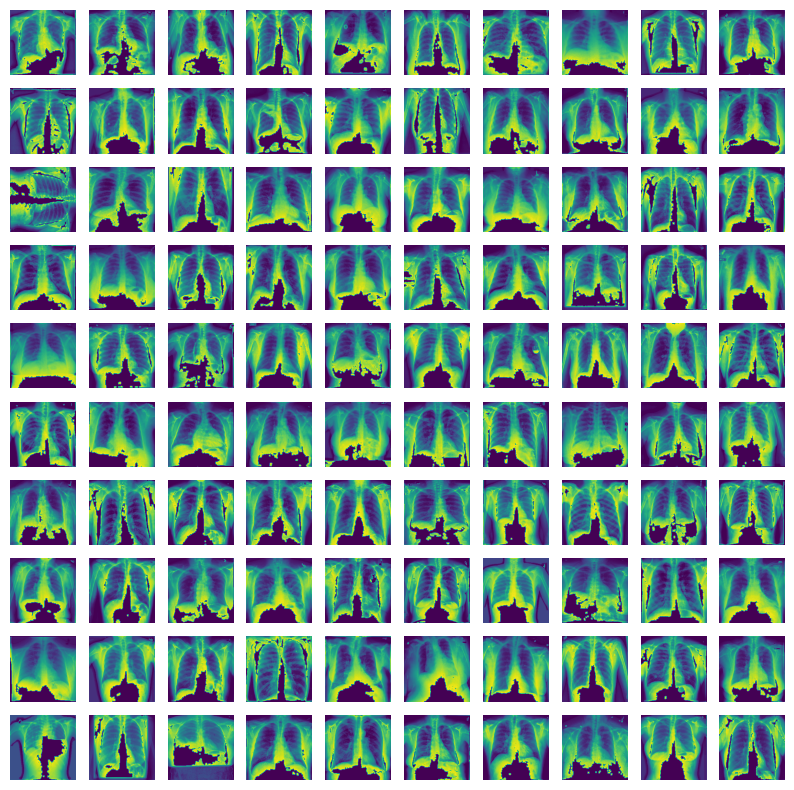

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Assuming images_dataset_00 is your PyTorch tensor
# Make sure to adjust the dimensions and values accordingly

# Select the first 100 images
num_images_to_display = 100
first_100_indices = range(num_images_to_display)

# Create a grid for displaying images (e.g., 10x10)
grid_size = (10, 10)
fig, axes = plt.subplots(*grid_size, figsize=(10, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Display the first 100 images
for i, idx in enumerate(first_100_indices):
    img = images_dataset_00[idx].numpy()  # Assuming images are in PyTorch tensor format
    axes[i].imshow(np.transpose(img, (1, 2, 0)))  # Transpose if needed (channels-last format)
    axes[i].axis('off')

plt.show()

## MedViT Model Initialization

In [ ]:
!git clone https://github.com/Omid-Nejati/MedViT.git

Cloning into 'MedViT'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 46 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (46/46), 765.00 KiB | 5.98 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
cd /content/MedViT

/content/MedViT


In [ ]:
!pip install timm
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
from MedViT import MedViT_large as large

model = large(pretrained=True)
model = model.cuda()

initialize_weights...


In [ ]:
cd /content

/content


In [ ]:
import torch.nn as nn
import torch

class MedViTFeatureExtractor(nn.Module):
    def __init__(self, model):
        super(MedViTFeatureExtractor, self).__init__()

        self.stem = model.stem
        self.features = model.features
        self.norm = model.norm
        self.avgpool = model.avgpool

    def forward(self, x):
        features = []

        x = self.stem(x)

        with torch.no_grad():
            for layer in self.features:
                x = layer(x)
            x = self.norm(x)
            x = self.avgpool(x)

            features.append(x.clone())

        return features

feature_extractor = MedViTFeatureExtractor(model)

feature_extractor.eval()

def persist_features(features, filename):
    with h5py.File(filename, 'w') as hf:
        hf.create_dataset('features', data=features.cpu().detach().numpy())

In [ ]:
from torch.utils.data import Dataset, DataLoader, Subset
import torch

subset = Subset(images_dataset, indices=range(3600, 3822))

# Create a DataLoader for your dataset
dataloader = DataLoader(subset, batch_size=len(subset))

# Extract a single batch, which will contain all the data
images_tensor = next(iter(dataloader)).float()

print(images_tensor.shape)

torch.Size([222, 1, 224, 224])


In [ ]:
extracted_features = feature_extractor(images_tensor.expand(-1, 3, -1, -1).to('cuda'))
#extracted_features = feature_extractor(images_tensor)

persist_features(extracted_features[-1], 'image_features_front_eq_mask_09.h5')

print(extracted_features[-1].shape)

torch.Size([222, 1024, 1, 1])


In [ ]:
import numpy as np

def load_features(images_features_path):
    # Open the HDF5 file for reading
    with h5py.File(images_features_path, 'r') as f:
        # Read the 'images' dataset
        features_tensor = f['features'][:]

    return features_tensor

# Initialize an empty array to store concatenated features
all_features = None

# Loop through file indices from 00 to 20
for i in range(10):  # Assuming you want to include 'image_features_20.h5'
    # Generate the file path
    file_path = repo_features_path + 'image_features_front_eq_mask_{:02d}.h5'.format(i)
    print(file_path)

    # Load features from the file
    loaded_features = load_features(file_path)

    # Concatenate features
    if all_features is None:
        all_features = loaded_features
    else:
        all_features = np.concatenate((all_features, loaded_features), axis=0)

# Now, all_features contains the concatenated features from 'image_features_00.h5' to 'image_features_20.h5'
loaded_features = all_features

transformers-image-captioning/features/front_eq_mask/image_features_front_eq_mask_00.h5
transformers-image-captioning/features/front_eq_mask/image_features_front_eq_mask_01.h5
transformers-image-captioning/features/front_eq_mask/image_features_front_eq_mask_02.h5
transformers-image-captioning/features/front_eq_mask/image_features_front_eq_mask_03.h5
transformers-image-captioning/features/front_eq_mask/image_features_front_eq_mask_04.h5
transformers-image-captioning/features/front_eq_mask/image_features_front_eq_mask_05.h5
transformers-image-captioning/features/front_eq_mask/image_features_front_eq_mask_06.h5
transformers-image-captioning/features/front_eq_mask/image_features_front_eq_mask_07.h5
transformers-image-captioning/features/front_eq_mask/image_features_front_eq_mask_08.h5
transformers-image-captioning/features/front_eq_mask/image_features_front_eq_mask_09.h5


In [ ]:
import numpy as np
import torch

features = torch.tensor(np.array(loaded_features)).float()
print(features.shape)

torch.Size([3822, 1024, 1, 1])


In [ ]:
import pandas as pd

repo_path = 'transformers-image-captioning/'

n_features = len(features)

def create_feature_report_dataframe(feature_tensor, image_ids_file, reports_csv):
    # Step 1: Read the first 100 lines from image_ids.txt
    with open(image_ids_file, 'r') as f:
        #image_ids = [line.strip() for line in f.readlines()[:350]]
        image_ids = [line.strip() for line in f.readlines()][:n_features]

    # Step 2: Load indiana_reports.csv into a DataFrame
    reports_df = pd.read_csv(reports_csv)

    # Step 3: Concatenate "findings" and "impressions" columns to create the report
    reports_df['report'] = reports_df['findings'] + ' ' + reports_df['impression']

    # Step 4: Create a DataFrame that links features with reports

    features_df = pd.DataFrame(feature_tensor.detach().numpy())
    reports = [reports_df.loc[reports_df['uid'] == int(id), 'report'].values[0] for id in image_ids]

    df = features_df.copy()
    df['report'] = reports

    df = df.dropna(subset=[df.columns[-1]])

    return df

image_ids_file = repo_path + 'image_ids.txt'
reports_csv = repo_path + 'indiana_reports.csv'

#df = create_feature_report_dataframe(features.reshape(350, -1), image_ids_file, reports_csv)
df = create_feature_report_dataframe(features.reshape(len(features), -1), image_ids_file, reports_csv)
print(df.shape)

(3305, 1025)


In [ ]:
import pandas as pd

repo_path = 'transformers-image-captioning/'

n_features = len(features)

def create_images_report_dataframe(images_tensor, image_ids_file, reports_csv):
    # Step 1: Read the first 100 lines from image_ids.txt
    with open(image_ids_file, 'r') as f:
        #image_ids = [line.strip() for line in f.readlines()[:350]]
        image_ids = [line.strip() for line in f.readlines()[:n_features]]

    # Step 2: Load indiana_reports.csv into a DataFrame
    reports_df = pd.read_csv(reports_csv)

    # Step 3: Concatenate "findings" and "impressions" columns to create the report
    reports_df['report'] = reports_df['findings'] + ' ' + reports_df['impression']

    # Step 4: Create a DataFrame that links features with reports

    features_df = pd.DataFrame(images_tensor.detach().numpy())
    reports = [reports_df.loc[reports_df['uid'] == int(id), 'report'].values[0] for id in image_ids]

    df = features_df.copy()
    df['report'] = reports

    df = df.dropna(subset=[df.columns[-1]])

    return df

image_ids_file = repo_path + 'image_ids.txt'
reports_csv = repo_path + 'indiana_reports.csv'

#df = create_images_report_dataframe(images_dataset[:350, :, :, :].reshape(350, -1), image_ids_file, reports_csv)
df = create_images_report_dataframe(images_dataset[:n_features, :, :, :].reshape(n_features, -1), image_ids_file, reports_csv)
print(df.shape)

(3305, 50177)


In [ ]:
# Function to remove "XXXX" occurrences
def remove_xxxx(text):
    return text.replace("XXXX", "")

# Function to remove extra white spaces
def remove_extra_spaces(text):
    return ' '.join(text.split())

df['report'] = df['report'].apply(remove_xxxx)
df['report'] = df['report'].apply(remove_extra_spaces)

max_length = df['report'].apply(lambda x: len(x.split())).mean()

print(max_length)

print(df['report'].iloc[80])

38.689258698940996
There is a stable closure device projected over the heart. The heart and mediastinum are otherwise normal. There is stable scarring of left mid lung. The lungs are otherwise clear. There is no infiltrate, effusion, mass or pneumothorax. Stable appearance of the chest


In [ ]:
!git clone https://huggingface.co/healx/gpt-2-pubmed-medium

Cloning into 'gpt-2-pubmed-medium'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), 539.58 KiB | 9.63 MiB/s, done.


In [ ]:
# "model_type": "gpt2"

In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor
from transformers import AutoTokenizer, GPT2Config, default_data_collator
from transformers import BioGptTokenizer, BioGptForCausalLM
from transformers import GPT2Tokenizer, GPT2Model

class config :
    ENCODER = "google/vit-base-patch16-224"
    DECODER = "gpt-2-pubmed-medium"
    TRAIN_BATCH_SIZE = 3
    VAL_BATCH_SIZE = 3
    EPOCHS = 10

def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
    outputs = [self.bos_token_id] + token_ids_0 + [self.eos_token_id]
    return outputs

AutoTokenizer.build_inputs_with_special_tokens = build_inputs_with_special_tokens

feature_extractor = ViTFeatureExtractor.from_pretrained(config.ENCODER)
tokenizer = AutoTokenizer.from_pretrained(config.DECODER)
tokenizer.pad_token = tokenizer.unk_token

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from PIL import Image

class ImgDataset(Dataset):
    def __init__(self, df, tokenizer, feature_extractor):
        self.df = df
        self.tokenizer= tokenizer
        self.max_length = int(40 * 1.5)
        self.feature_extractor = feature_extractor

    def __len__(self,):
        return len(self.df)

    def __getitem__(self,idx):
        caption = self.df.report.iloc[idx]

        features = np.array(df.iloc[idx, :-1]).reshape(224, 224)
        features = Image.fromarray(np.uint8(features)).convert("RGB")
        pixel_values = self.feature_extractor(features, return_tensors="pt").pixel_values
        captions = self.tokenizer(caption,
                                 padding='max_length',
                                 max_length=self.max_length).input_ids

        captions = [caption if caption != self.tokenizer.pad_token_id else -100 for caption in captions][:self.max_length]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(captions)}
        return encoding

train_df, test_df = train_test_split(df, test_size = 0.1)
train_df, valid_df = train_test_split(train_df, test_size = 0.01)

print('TRAINING SAMPLES', len(train_df))
print('VALIDATION SAMPLES', len(valid_df))
print('TEST SAMPLES', len(test_df))

train_dataset = ImgDataset(train_df, tokenizer=tokenizer, feature_extractor=feature_extractor)
valid_dataset = ImgDataset(valid_df, tokenizer=tokenizer, feature_extractor=feature_extractor)
test_dataset = ImgDataset(test_df, tokenizer=tokenizer, feature_extractor=feature_extractor)

TRAINING SAMPLES 2944
VALIDATION SAMPLES 30
TEST SAMPLES 331


In [ ]:
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(config.ENCODER, config.DECODER)

model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = model.config.decoder.vocab_size
model.config.eos_token_id = tokenizer.sep_token_id
model.config.decoder_start_token_id = tokenizer.bos_token_id
model.config.max_length = int(40 * 1.5)
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt-2-pubmed-medium and are newly initialized: ['h.3.crossattention.q_attn.bias', 'h.0.crossattention.c_attn.weight', 'h.19.crossattention.q_attn.weight', 'h.10.crossattention.q_attn.weight', 'h.4.crossattention.q_attn.bias', 'h.15.ln_cross_attn.weight', 'h.12.ln_cross_attn.bias', 'h.1.ln_cross_attn.bias', 'h.12.crossattention.c_attn.bias', 'h.19.ln_cross_attn.weight', 'h.10.crossattention.q_attn.bias', 'h.11.crossattention.c_proj.bias', 'h.15.ln_cross_attn.bias', 'h.17.crossattention.c_proj.bias', 'h.8.crossattention.c_proj.weight', 'h.20.ln_cross_attn.weight', 'h.15.crossattention.q_attn.weight', 'h.12.ln_cross_att

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir='ViTGPT2',
    per_device_train_batch_size=config.TRAIN_BATCH_SIZE,
    per_device_eval_batch_size=config.VAL_BATCH_SIZE,
    predict_with_generate=True,
    evaluation_strategy="steps",
    do_train=True,
    do_eval=True,
    logging_steps=256,
    save_steps=2048,
    warmup_steps=256,
    learning_rate = 5e-5,
    #max_steps=10, # comment for full training
    num_train_epochs = config.EPOCHS,
    overwrite_output_dir=True,
    save_total_limit=1,
)

In [ ]:
import datasets

rouge = datasets.load_metric("rouge")
bleu = datasets.load_metric("sacrebleu")

def compute_metrics(pred):

    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    # all unnecessary tokens are removed
    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = tokenizer.pad_token_id
    label_str = tokenizer.batch_decode(labels_ids, skip_special_tokens=True)

    rouge_output = rouge.compute(predictions=pred_str, references=label_str, rouge_types=["rougeL"])

    bleu_output = bleu.compute(predictions=[pred.strip() for pred in pred_str], references=[[label.strip()] for label in label_str])

    return {
        "rougeL_precision": round(rouge_output["rougeL"].mid.precision, 4),
        "rougeL_recall": round(rouge_output["rougeL"].mid.recall, 4),
        "rougeL_fmeasure": round(rouge_output["rougeL"].mid.fmeasure, 4),
        "bleu1": round(bleu_output["precisions"][0]/100, 4),
        "bleu2": round(bleu_output["precisions"][1]/100, 4),
        "bleu3": round(bleu_output["precisions"][2]/100, 4),
        "bleu4": round(bleu_output["precisions"][3]/100, 4),
    }

<ipython-input-18-e984973e91b9>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = datasets.load_metric("rouge")


In [ ]:
# instantiate trainer
trainer = Seq2SeqTrainer(
    tokenizer=feature_extractor,
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    data_collator=default_data_collator,
)
trainer.train()

Step,Training Loss,Validation Loss,Rougel Precision,Rougel Recall,Rougel Fmeasure,Bleu1,Bleu2,Bleu3,Bleu4
256,2.701100,1.215403,0.339400,0.396600,0.358900,0.468400,0.198200,0.108100,0.057400
512,1.553700,0.990763,0.317700,0.412800,0.352800,0.457700,0.216500,0.117300,0.061000
768,1.304200,0.863306,0.310400,0.348100,0.322800,0.439300,0.204400,0.123400,0.079600
1024,1.189000,0.819007,0.287000,0.374300,0.318500,0.417500,0.210000,0.104000,0.056200
1280,1.103700,0.783237,0.289800,0.374700,0.320500,0.424600,0.233300,0.143200,0.092200
1536,1.066200,0.746721,0.296100,0.351400,0.315700,0.426200,0.191900,0.120000,0.082900
1792,1.012800,0.738280,0.268300,0.331300,0.290800,0.372500,0.148900,0.065200,0.028700
2048,0.890900,0.707692,0.296100,0.351400,0.315700,0.426200,0.191900,0.120000,0.082900
2304,0.861500,0.710941,0.358800,0.431700,0.384100,0.478300,0.219800,0.139800,0.091700
2560,0.875500,0.688347,0.296100,0.351400,0.315700,0.426200,0.191900,0.120000,0.082900


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
Removed shared tensor {'decoder.lm_head.weight'} while saving. This should be OK, but check by verifying that you don't receive any warning while reloading


TrainOutput(global_step=9820, training_loss=0.7616670060789027, metrics={'train_runtime': 8176.0161, 'train_samples_per_second': 3.601, 'train_steps_per_second': 1.201, 'total_flos': 1.303668730059817e+19, 'train_loss': 0.7616670060789027, 'epoch': 10.0})

In [ ]:
import pandas as pd

pd.DataFrame(trainer.state.log_history)

,loss,learning_rate,epoch,step,eval_loss,eval_rougeL_precision,eval_rougeL_recall,eval_rougeL_fmeasure,eval_bleu1,eval_bleu2,eval_bleu3,eval_bleu4,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,2.7011,5.000000e-05,0.26,256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.26,256,1.215403,0.3394,0.3966,0.3589,0.4684,0.1982,0.1081,0.0574,51.2143,0.586,0.195,NaN,NaN,NaN,NaN,NaN
2,1.5537,4.866165e-05,0.52,512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.52,512,0.990763,0.3177,0.4128,0.3528,0.4577,0.2165,0.1173,0.0610,52.2022,0.575,0.192,NaN,NaN,NaN,NaN,NaN
4,1.3042,4.732330e-05,0.78,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.4465,1.819322e-06,9.65,9472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,NaN,9.65,9472,0.739256,0.2961,0.3514,0.3157,0.4262,0.1919,0.1200,0.0829,52.8587,0.568,0.189,NaN,NaN,NaN,NaN,NaN
74,0.4561,4.809703e-07,9.91,9728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,9.91,9728,0.739993,0.2961,0.3514,0.3157,0.4262,0.1919,0.1200,0.0829,53.2397,0.563,0.188,NaN,NaN,NaN,NaN,NaN


In [ ]:
def compute_metrics_(pred, label):

    pred_str = tokenizer.batch_decode(pred, skip_special_tokens=True)

    rouge_output = rouge.compute(predictions=[' '.join(pred_str)], references=[label], rouge_types=["rougeL"])

    bleu_output = bleu.compute(predictions=[' '.join(pred_str)], references=[[label]])

    return {
        "rougeL_precision": round(rouge_output["rougeL"].mid.precision, 4),
        "rougeL_recall": round(rouge_output["rougeL"].mid.recall, 4),
        "rougeL_fmeasure": round(rouge_output["rougeL"].mid.fmeasure, 4),
        "bleu1": round(bleu_output["precisions"][0]/100, 4),
        "bleu2": round(bleu_output["precisions"][1]/100, 4),
        "bleu3": round(bleu_output["precisions"][2]/100, 4),
        "bleu4": round(bleu_output["precisions"][3]/100, 4),
    }

In [ ]:
def evaluate(test_df, compute_metrics):

  n = len(test_df)

  total_rougeL_precision = 0
  total_rougeL_recall = 0
  total_rougeL_fmeasure = 0
  total_bleu1 = 0
  total_bleu2 = 0
  total_bleu3 = 0
  total_bleu4 = 0

  for idx in range(len(test_df)):


    report = test_df.iloc[idx, -1]

    max_length = int(len(report.split()) * 1.5)

    image = np.array(test_df.iloc[idx, :-1]).reshape(224, 224)
    image = Image.fromarray(np.uint8(image)).convert("RGB")
    prediction = model.generate(feature_extractor(image, return_tensors="pt").pixel_values.to("cuda"), max_length=max_length)[0]

    print(idx + 1)
    print(report)
    print(tokenizer.decode(prediction))
    print()

    results = compute_metrics_(prediction, report)
    total_rougeL_precision += results['rougeL_precision']
    total_rougeL_recall += results['rougeL_recall']
    total_rougeL_fmeasure += results['rougeL_fmeasure']
    total_bleu1 += results['bleu1']
    total_bleu2 += results['bleu2']
    total_bleu3 += results['bleu3']
    total_bleu4 += results['bleu4']

  print('\n\nROUGE-L Precision:', total_rougeL_precision / n)
  print('ROUGE-L Recall', total_rougeL_recall / n)
  print('ROUGE-L F-Score', total_rougeL_fmeasure / n)
  print('BLEU-1', total_bleu1 / n)
  print('BLEU-2', total_bleu2 / n)
  print('BLEU-3', total_bleu3 / n)
  print('BLEU-4', total_bleu4 / n)

evaluate(test_df, compute_metrics_)
#print(test_df)

1
There is a left-sided PICC with tip at the caval atrial junction. The cardiomediastinal contours are within normal limits. Pulmonary vasculature is unremarkable. There is no focal airspace opacity. No pleural effusion or pneumothorax is seen. Stable short segment catheter tubing overlying the left , to reside within anterior chest soft tissues on recent chest CT. Stable remote posttraumatic changes of multiple right ribs. 1. Left PICC tip at cavoatrial junction. 2. No acute cardiopulmonary abnormality.
<|endoftext|>The heart is normal in size and contour. There is no mediastinal widening. The lungs are clear bilaterally. No large pleural effusion or pneumothorax. The are intact. No acute cardiopulmonary abnormalities. Specifically, no evidence of tuberculosis. Stable cardiomegaly and mild contour unremarkable bony structures. No pulmonary edema or pulmonary failure.. Stable appearance of the chest without acute pulmonary abnormality.... No evidence of active tuberculosis. If there is

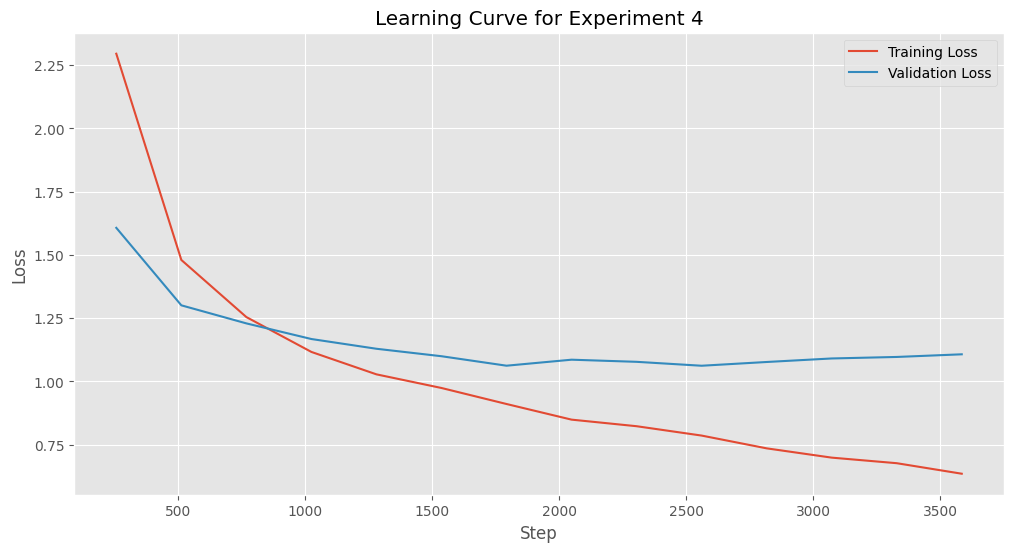

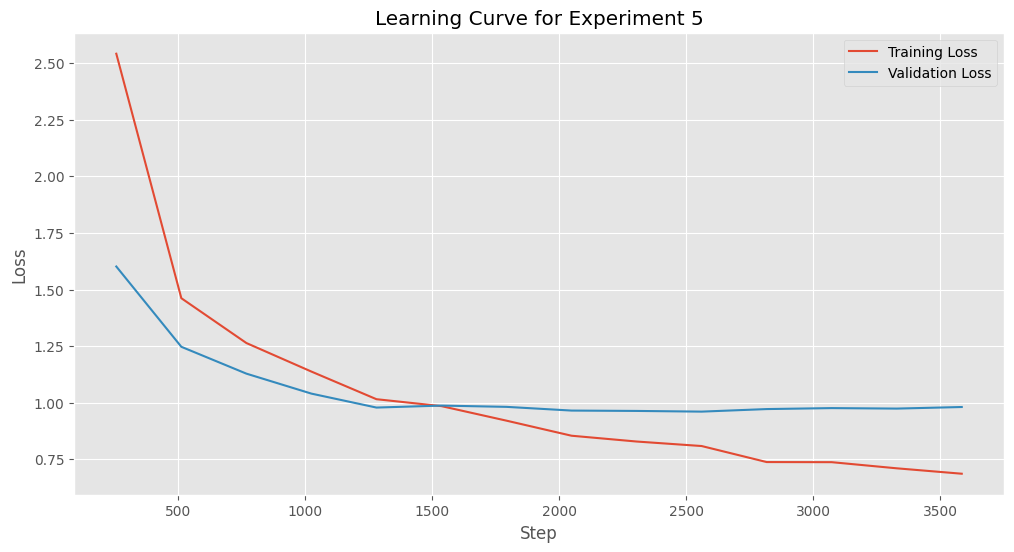

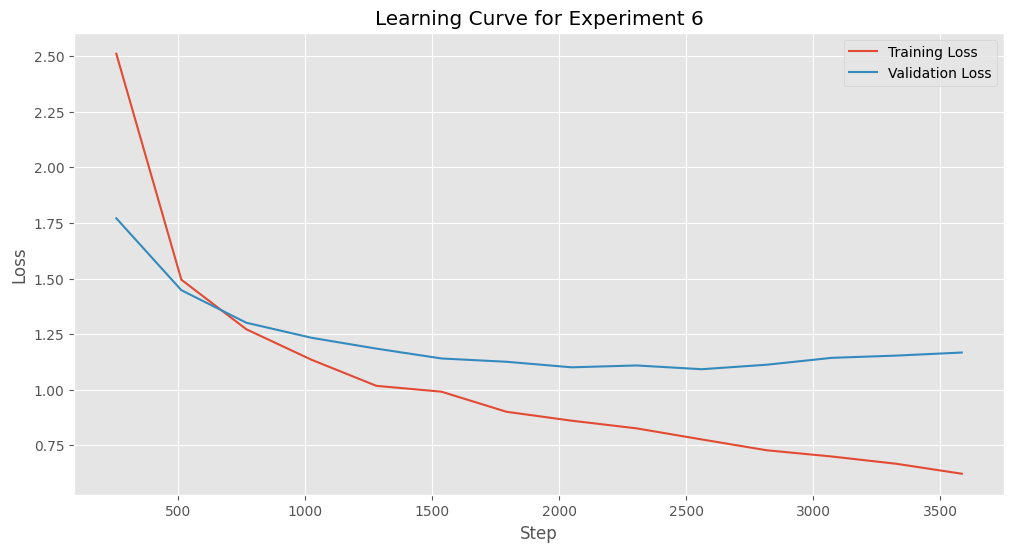

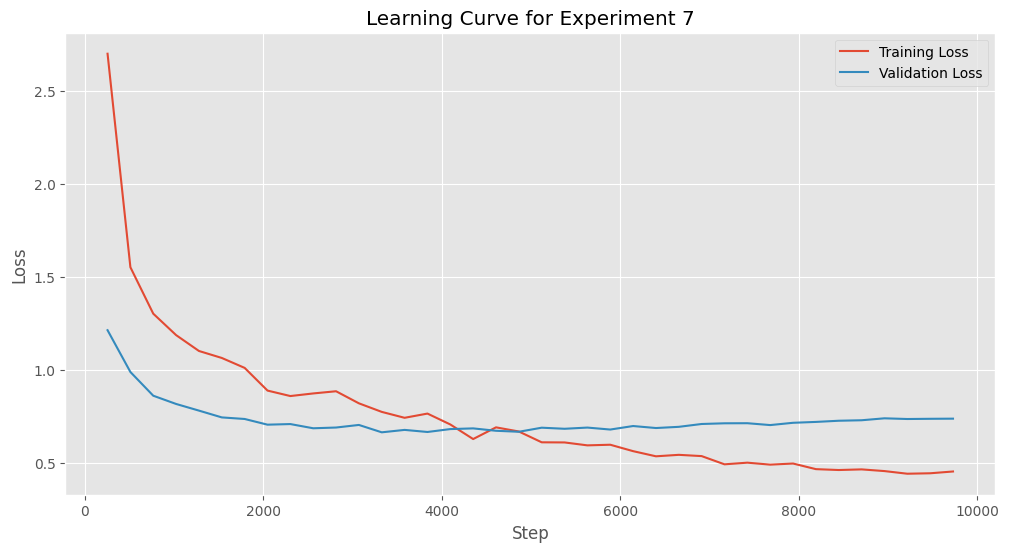

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Read the Excel file
file_path = 'results.xlsx'
experiment_sheets = ['Experiment 4', 'Experiment 5', 'Experiment 6', 'Experiment 7']
dfs = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in experiment_sheets}

# Plot Learning Curve (Training and Validation Loss vs Step) for each experiment
for sheet, df in dfs.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df['Step'], df['Training Loss'], label='Training Loss')
    plt.plot(df['Step'], df['Validation Loss'], label='Validation Loss')
    plt.title(f'Learning Curve for {sheet}')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
